<a href="https://colab.research.google.com/github/ramakrishnabhavana/Bhavana-sML/blob/main/ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week-1

In [ ]:
import pandas as pd
data = {
    2014: [100.5, 150.8, 200.9, 30000, 40000],
    2015: [12000, 18000, 22000, 30000, 45000],
    2016: [20000, 50000, 70000, 100000, 125000],
    2017: [50000, 60000, 70000, 80000, 90000]
}
index = ['Madhu', 'Kusum', 'Kinshuk', 'Ankit', 'Shruti']
Sales = pd.DataFrame(data, index=index)
print(Sales)

            2014   2015    2016   2017
Madhu      100.5  12000   20000  50000
Kusum      150.8  18000   50000  60000
Kinshuk    200.9  22000   70000  70000
Ankit    30000.0  30000  100000  80000
Shruti   40000.0  45000  125000  90000


In [ ]:
# a) Display the row labels of Sales
print("a) Row Labels:")
print(Sales.index)

# b) Display the column labels of Sales
print("\nb) Column Labels:")
print(Sales.columns)

# c) Display the data types of each column of Sales
print("\nc) Data Types:")
print(Sales.dtypes)

# d) Display the dimensions, shape, size and values of Sales
print("\nd) DataFrame Properties:")
print("Dimensions:", Sales.ndim)
print("Shape:", Sales.shape)
print("Size:", Sales.size)
print("Values:\n", Sales.values)

# e) Display the last two rows of Sales
print("\ne) Last Two Rows:")
print(Sales.tail(2))

# f) Display the first two columns of Sales
print("\nf) First Two Columns:")
print(Sales.iloc[:, :2])


a) Row Labels:
Index(['Madhu', 'Kusum', 'Kinshuk', 'Ankit', 'Shruti'], dtype='object')

b) Column Labels:
Index([2014, 2015, 2016, 2017], dtype='int64')

c) Data Types:
2014    float64
2015      int64
2016      int64
2017      int64
dtype: object

d) DataFrame Properties:
Dimensions: 2
Shape: (5, 4)
Size: 20
Values:
 [[1.005e+02 1.200e+04 2.000e+04 5.000e+04]
 [1.508e+02 1.800e+04 5.000e+04 6.000e+04]
 [2.009e+02 2.200e+04 7.000e+04 7.000e+04]
 [3.000e+04 3.000e+04 1.000e+05 8.000e+04]
 [4.000e+04 4.500e+04 1.250e+05 9.000e+04]]

e) Last Two Rows:
           2014   2015    2016   2017
Ankit   30000.0  30000  100000  80000
Shruti  40000.0  45000  125000  90000

f) First Two Columns:
            2014   2015
Madhu      100.5  12000
Kusum      150.8  18000
Kinshuk    200.9  22000
Ankit    30000.0  30000
Shruti   40000.0  45000


In [ ]:
import pandas as pd
data_2018 = {
    'Madhu': 160000,
    'Kusum': 110000,
    'Kinshuk': 500000,
    'Ankit': 340000,
    'Shruti': 900000
}

# Convert the dictionary to a DataFrame
Sales2 = pd.DataFrame.from_dict(data_2018, orient='index', columns=[2018])
# Display the DataFrame
print("g) Sales2 DataFrame:")
print(Sales2)
#h Check if Sales2 is empty or it contains data.
print(Sales2.empty)

g) Sales2 DataFrame:
           2018
Madhu    160000
Kusum    110000
Kinshuk  500000
Ankit    340000
Shruti   900000
False


In [ ]:
import pandas as pd

# Q9: Original Sales DataFrame
Sales = pd.DataFrame({
    2014: [100.5, 150.8, 200.9, 30000, 40000],
    2015: [12000, 18000, 22000, 30000, 45000],
    2016: [20000, 50000, 70000, 100000, 125000],
    2017: [50000, 60000, 70000, 80000, 90000]
}, index=['Madhu', 'Kusum', 'Kinshuk', 'Ankit', 'Shruti'])

# Q10g: Create Sales2
Sales2 = pd.DataFrame.from_dict({
    'Madhu': 160000,
    'Kusum': 110000,
    'Kinshuk': 500000,
    'Ankit': 340000,
    'Shruti': 900000
}, orient='index', columns=[2018])

# a) Append Sales2 to Sales
Sales = pd.concat([Sales, Sales2], axis=1)
print("a) After appending Sales2:\n", Sales)

# b) Transpose Sales
Sales = Sales.T
print("\nb) Transposed Sales:\n", Sales)

# c) Sales in 2017 (from transposed DataFrame)
print("\nc) Sales in 2017:\n", Sales.loc[2017])

# d) Sales by Madhu and Ankit in 2017 and 2018
print("\nd) Madhu and Ankit sales in 2017 and 2018:\n", Sales.loc[[2017, 2018], ['Madhu', 'Ankit']])

# e) Sales by Shruti in 2016
print("\ne) Shruti sales in 2016:\n", Sales.loc[2016, 'Shruti'])

# f) Add Sumeet with sales for 2014–2018
Sales['Sumeet'] = [196.2, 37800, 52000, 78438, 38852]
print("\nf) Added Sumeet:\n", Sales)

# g) Delete data for 2014
Sales = Sales.drop(index=2014)
print("\ng) Deleted 2014:\n", Sales)

# h) Delete data for Kinshuk
Sales = Sales.drop(columns='Kinshuk')
print("\nh) Deleted Kinshuk:\n", Sales)

# i) Rename Ankit to Vivaan and Madhu to Shailesh
Sales = Sales.rename(columns={'Ankit': 'Vivaan', 'Madhu': 'Shailesh'})
print("\ni) Renamed Ankit and Madhu:\n", Sales)

# j) Update Shailesh's sale in 2018 to 100000
Sales.loc[2018, 'Shailesh'] = 100000
print("\nj) Updated Shailesh's 2018 sale:\n", Sales)

# k) Write to CSV without row or column labels
Sales.to_csv('SalesFigures.csv', index=False, header=False)

# l) Read from CSV and update labels
SalesRetrieved = pd.read_csv('SalesFigures.csv', header=None)
SalesRetrieved.index = Sales.index
SalesRetrieved.columns = Sales.columns
print("\nl) SalesRetrieved with updated labels:\n", SalesRetrieved)


a) After appending Sales2:
             2014   2015    2016   2017    2018
Madhu      100.5  12000   20000  50000  160000
Kusum      150.8  18000   50000  60000  110000
Kinshuk    200.9  22000   70000  70000  500000
Ankit    30000.0  30000  100000  80000  340000
Shruti   40000.0  45000  125000  90000  900000

b) Transposed Sales:
          Madhu     Kusum   Kinshuk     Ankit    Shruti
2014     100.5     150.8     200.9   30000.0   40000.0
2015   12000.0   18000.0   22000.0   30000.0   45000.0
2016   20000.0   50000.0   70000.0  100000.0  125000.0
2017   50000.0   60000.0   70000.0   80000.0   90000.0
2018  160000.0  110000.0  500000.0  340000.0  900000.0

c) Sales in 2017:
 Madhu      50000.0
Kusum      60000.0
Kinshuk    70000.0
Ankit      80000.0
Shruti     90000.0
Name: 2017, dtype: float64

d) Madhu and Ankit sales in 2017 and 2018:
          Madhu     Ankit
2017   50000.0   80000.0
2018  160000.0  340000.0

e) Shruti sales in 2016:
 125000.0

f) Added Sumeet:
          Madhu     K

In [ ]:
!pip install mysql-connector-python sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 54.6 MB/s eta 0:00:00


In [ ]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install pymysql sqlalchemy


week 2

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Iris.csv')
df.head()

Saving Iris.csv to Iris.csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv('Iris.csv')
print(df.shape)
print("Null values in the data set are",[col for col in df.columns if df[col].isnull().sum() > 0])
x_train,x_test,y_train,y_test = train_test_split(df.drop(labels=['Species'],axis=1 ),df['Species'],test_size=0.3,random_state=0)
constant_features = [features for features in x_train.columns if x_train[features].std() == 0]
print("There are ",len(constant_features),"constant features")
#constant_features = [col for col in df.columns if df[col].nunique() == 1]
#print("Constant features:", constant_features)
quasi_const_feat = []
for feature in x_train.columns:
  predominant = (x_train[feature].value_counts()/float (len(x_train))) .sort_values(ascending=False).values[0]
  if predominant > 0.999:
    quasi_const_feat.append(feature)
print("There are ",len(quasi_const_feat)," quasi constant features")
duplicated = []
for i in range(0,len(x_train.columns)):
  col_1 = x_train.columns[i]
  for col_2 in x_train.columns[i+1:]:
    if x_train[col_1].equals (x_train[col_2]):
      duplicated.append(col_2)
duplicated_features = set(duplicated)
print("There are",len(duplicated_features),"duplicated features")
x_train.drop(labels=quasi_const_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_const_feat,axis=1,inplace=True)
print("x taining data is",x_train.shape,"x test data is",x_test.shape)

(150, 6)
Null values in the data set are []
There are  0 constant features
There are  0  quasi constant features
There are 0 duplicated features
x taining data is (105, 5) x test data is (45, 5)


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/Breast_cancer_dataset.csv')
print(df.shape)

# Drop useless column
if 'Unnamed: 32' in df.columns:
    df.drop('Unnamed: 32', axis=1, inplace=True)

# Check for null values
print("Null values in the dataset:", [col for col in df.columns if df[col].isnull().sum() > 0])

# Drop ID column if it exists
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Target and Features
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Constant features
constant_features = [feature for feature in x_train.select_dtypes(include=[np.number]).columns
                     if x_train[feature].std() == 0]
print("There are", len(constant_features), "constant features")

# Quasi-constant features
quasi_const_feat = []
for feature in x_train.columns:
    value_counts = x_train[feature].value_counts()
    if len(value_counts) == 0:
        continue  # Skip empty column
    predominant = (value_counts / float(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_const_feat.append(feature)
print("There are", len(quasi_const_feat), "quasi-constant features")

# Duplicated features
duplicated = []
for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]
    for col_2 in x_train.columns[i+1:]:
        if x_train[col_1].equals(x_train[col_2]):
            duplicated.append(col_2)

duplicated_features = set(duplicated)
print("There are", len(duplicated_features), "duplicated features")

# Drop quasi-constant features
x_train = x_train.drop(labels=quasi_const_feat, axis=1)
x_test = x_test.drop(labels=quasi_const_feat, axis=1)

print("x training data is", x_train.shape, "x test data is", x_test.shape)


(569, 33)
Null values in the dataset: []
There are 0 constant features
There are 0 quasi-constant features
There are 0 duplicated features
x training data is (398, 30) x test data is (171, 30)


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


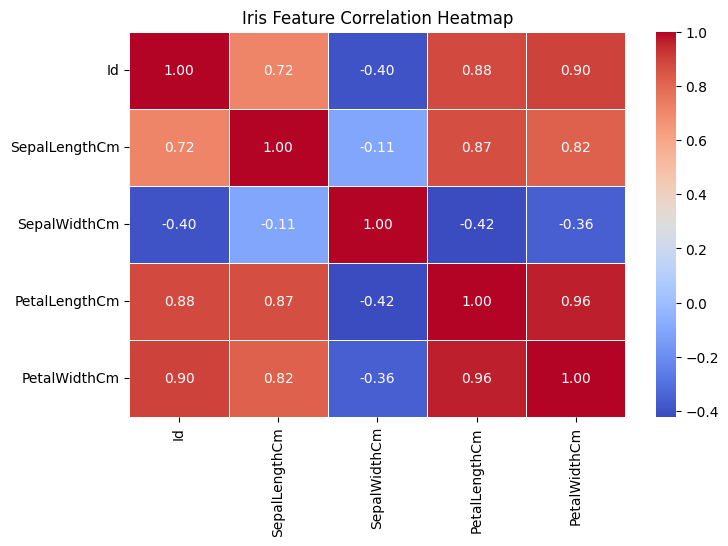

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Iris.csv')
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Iris Feature Correlation Heatmap')
plt.show()


10


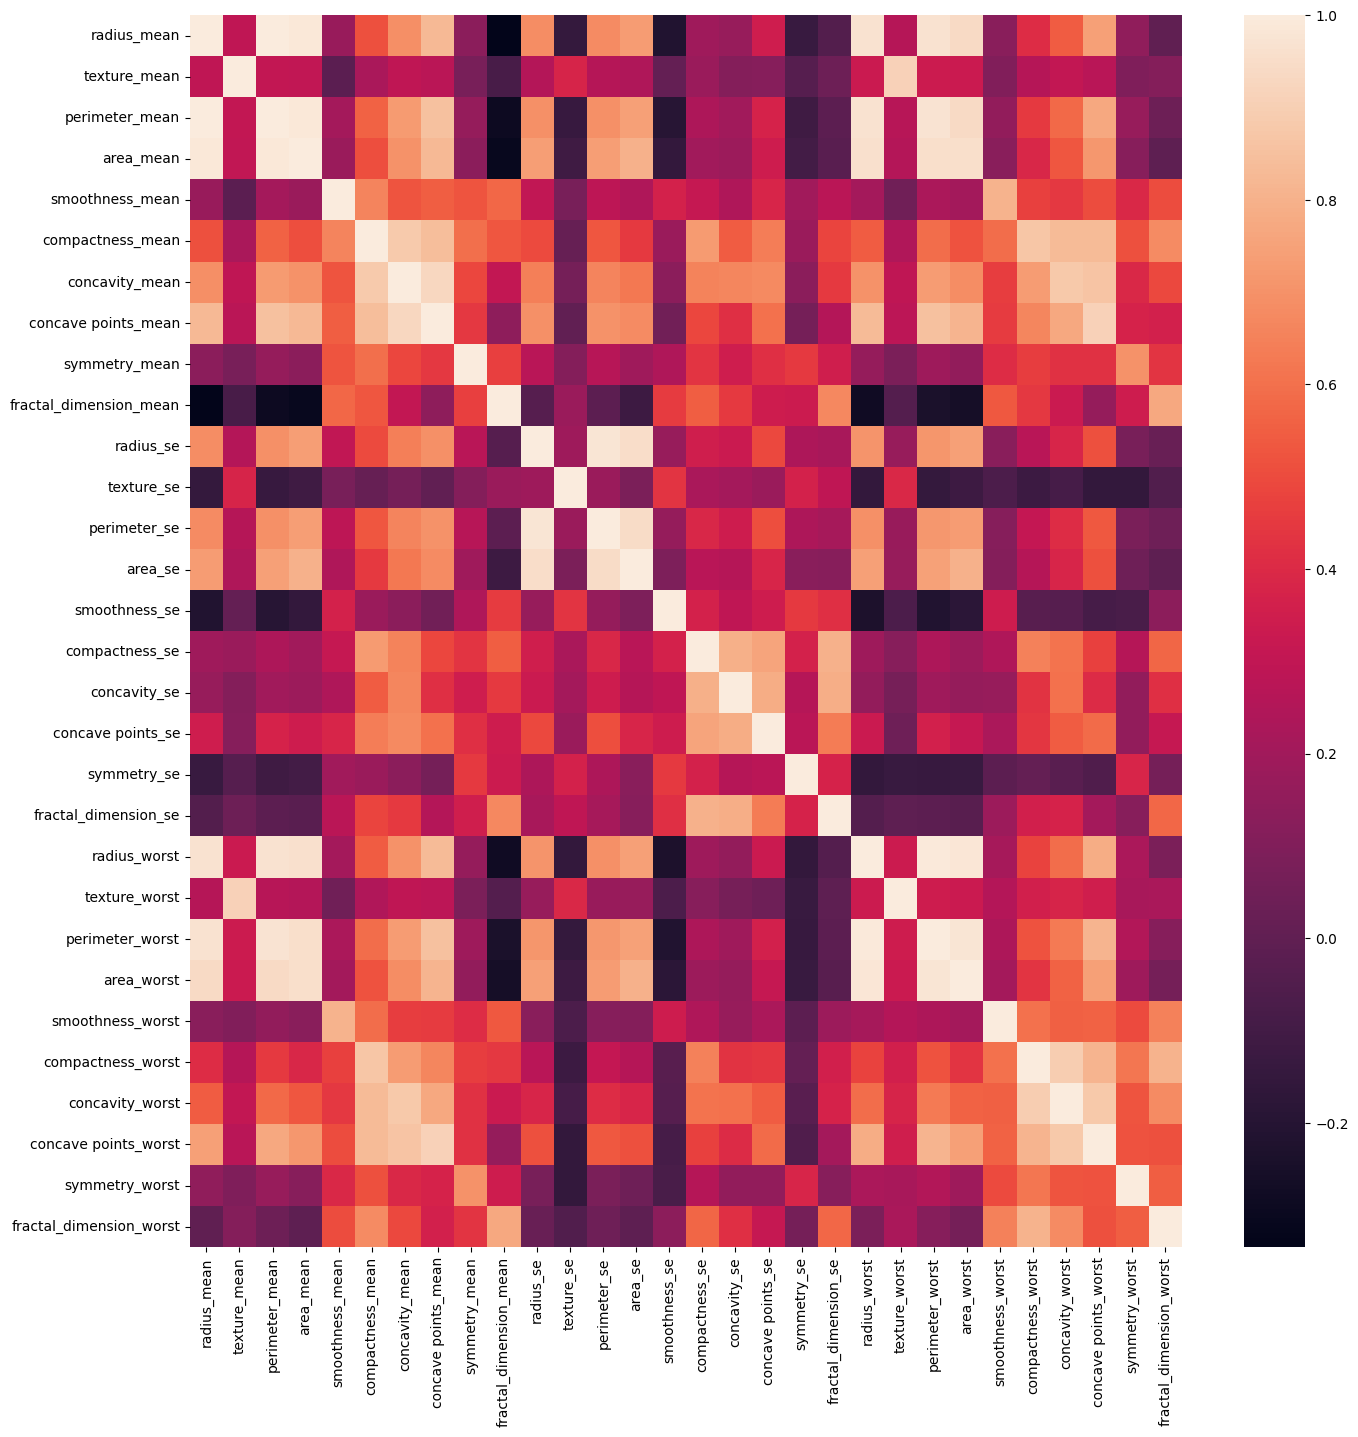

In [10]:
#iris
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corrmat)
grouped_feature_ls = []
correlated_groups = []
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr
corr_features = correlation(x_train,0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

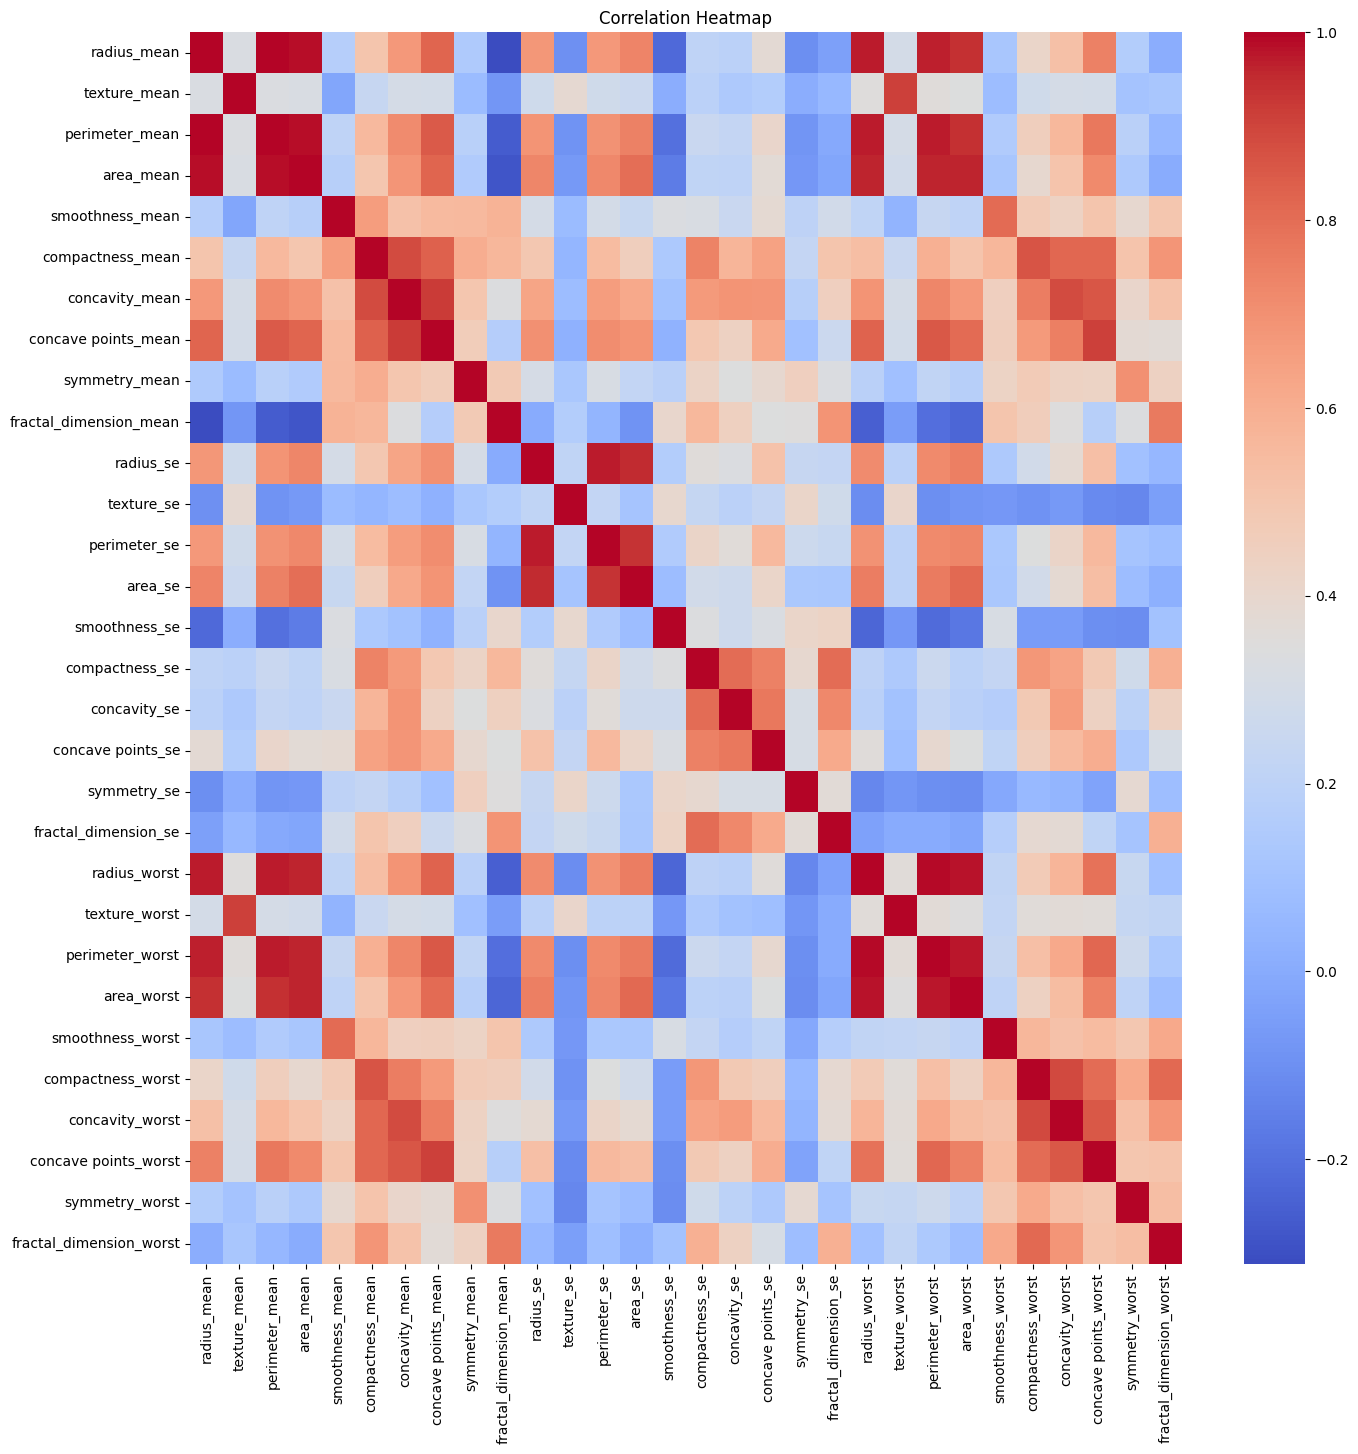

10
{'area_se', 'perimeter_mean', 'texture_worst', 'concave points_mean', 'concave points_worst', 'perimeter_worst', 'area_mean', 'area_worst', 'radius_worst', 'perimeter_se'}


In [14]:
#breat-cancer.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Breast_cancer_dataset.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
if 'id' in df.columns:
    df = df.drop(columns=['id'])
if 'diagnosis' in df.columns:
    df = df.drop(columns=['diagnosis'])

x_train = df.select_dtypes(include=['float64', 'int64'])

corrmat = x_train.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrmat, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train, 0.9)
correlated_features = set(corr_features)

print(len(correlated_features))
print(correlated_features)
